# pyICON.view for cdo remapped data

Load the necessary modules:

In [1]:
# if this line is not separated from the line below this cell has to be executed twice
# Jupyter Notebook with widget matplotlib plots
%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
#%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
#import pyicon_jupyter as jup
import pyicon as pyic  
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import matplotlib
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
import numpy as np

## Specify data set

Define a dataset with giving the path to the data and information about the triangular grid and the regular grid. The regular grid needs to be created in advance (use pyic.calc_ckdtree for that).

In [3]:
run = 'dpp0016'
runname = ''
gname = 'r2b9a'
lev = ''

path_data     = f'/work/bk1040/k202134/DYAMONDPP/dpp0016/remapped/'
# path_data     = f'/work/mh0287/k203123/GIT/icon-aes-dyw_albW/experiments/{run}/'
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'

In [4]:
IcD = pyic.IconData(
#                fname        = run+'_atm_3d_w_ml_????????????????.nc',
#                fname        = run+'_atm_3d_2_ml_????????????????.nc',
    fname        = run+'_atm_3d_speed_ml_????????????????_3600x1800.nc',
    path_data    = path_data,
    path_grid    = path_grid,
    gname        = gname,
    lev          = lev,
    model_type   = 'atm',
    do_triangulation = False,
    omit_last_file   = True,
    calc_coeff       = False,
    load_triangular_grid = False,
    load_grid_from_data_file = True,
    verbose          = True,
              )
# Fake depth data
IcD.depthc=np.arange(77)

-v-: set paths and fnames
-v-: set global variables
-v-: find  ckdtrees etc.
::: Warning: Could not find any section-npz-file in /mnt/lustre01/work/mh0033/m300602/icon/grids/r2b9a/ckdtree/sections/. :::
::: Warning: no section found.:::
-v-: load rgrid
-v-: load vgrid
-v-: list of variables and time steps
-v-: load_grid_from_file
::: Warning: No variable 'depth' in netcdf file. :::


In [5]:
a = pyic.load_hsnap(IcD.flist[0], 'speed', 0, 0)

Loading speed from /work/bk1040/k202134/DYAMONDPP/dpp0016/remapped/dpp0016_atm_3d_speed_ml_20200302T000000Z_3600x1800.nc


In [28]:
a.shape

(1800, 3600)

## Plotting on a regular grid

::: Warning: No variable 'depth' in netcdf file. :::


<IPython.core.display.Javascript object>


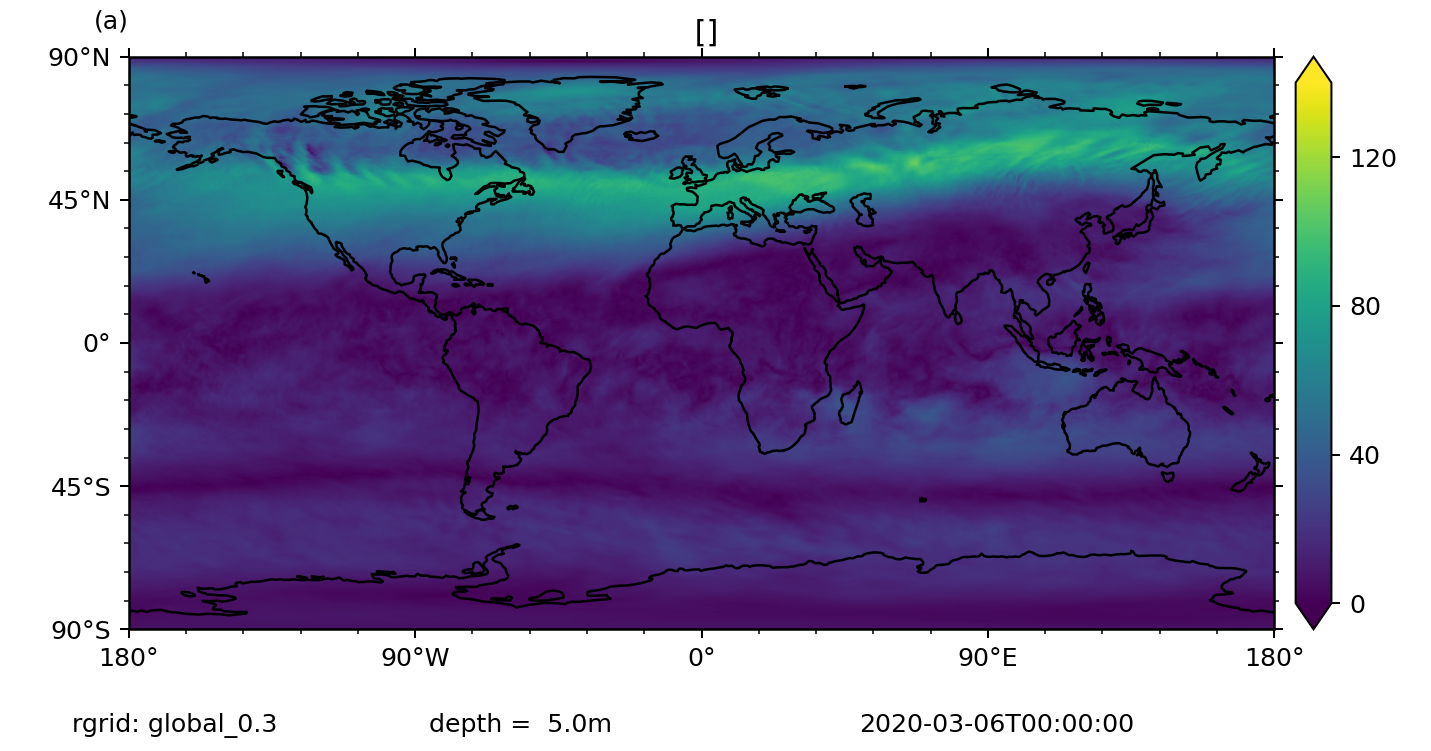

Output()

In [36]:
PyicV = pyic.view.hplot(IcD, grid_type='fgrid', logplot=False, verbose=False)

In [17]:
PyicV.IcD.Lon.shape

(600, 1200)

-v-: parameters
-v-: initialize_plot
-v-: reload grid
::: Warning: No variable 'depth' in netcdf file. :::
-v-: load_hsnap
Loading speed from /work/bk1040/k202134/DYAMONDPP/dpp0016/remapped/dpp0016_atm_3d_speed_ml_20200302T000000Z_3600x1800.nc


<IPython.core.display.Javascript object>


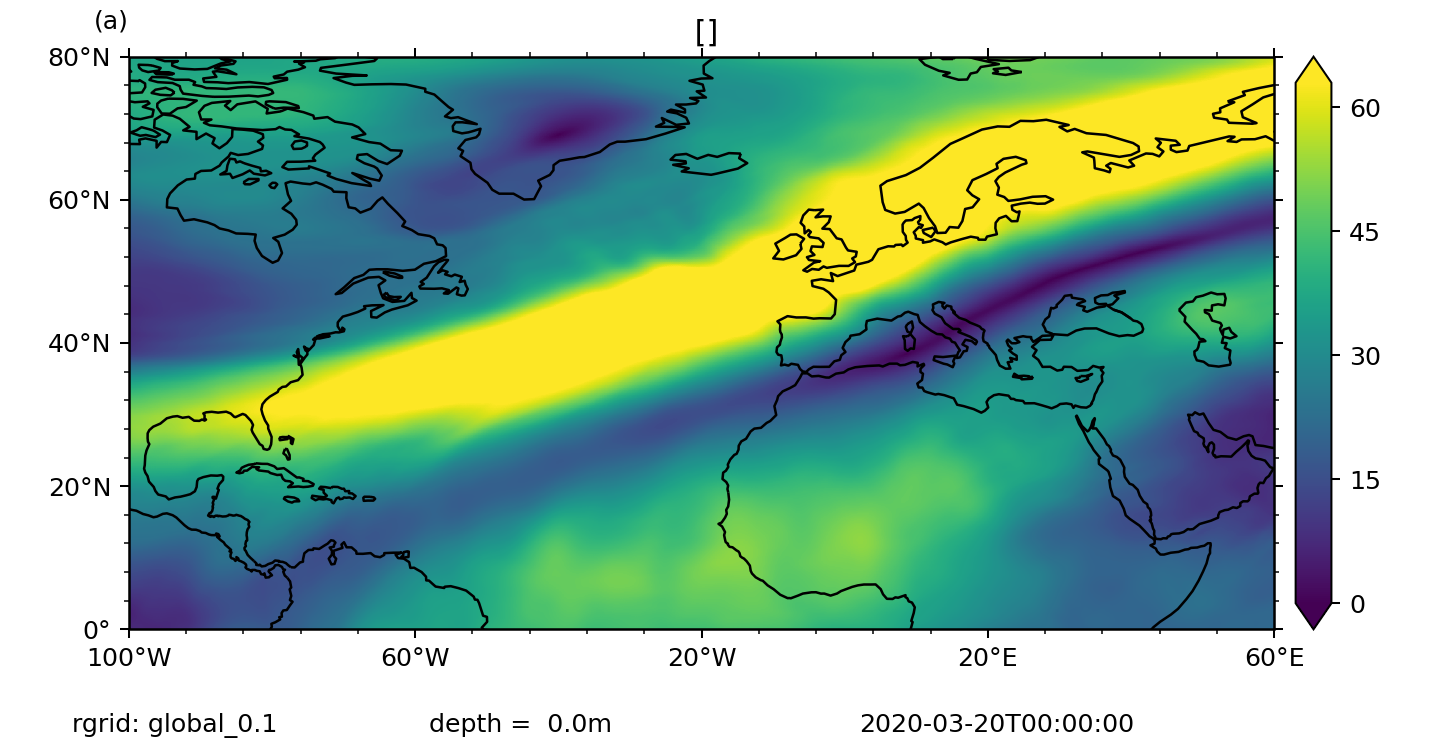

-v-: Done initializing!
-v-: widgets


Output()

In [37]:
lon_reg = [-100,60]
lat_reg = [0,80]
PyicV = pyic.view.hplot(IcD, grid_type='fgrid', logplot=False, verbose=True, 
                        lon_reg=lon_reg, lat_reg=lat_reg, rgrid_name='global_0.1')

In [33]:
PyicV.update_fig_hplot(var='speed', iz=0, step_snap=10, rgrid_name=PyicV.IcD.rgrid_name)

## For debugging / testing

In [38]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from cartopy import crs as ccrs

In [39]:
var = 'speed'
f = Dataset(IcD.flist[0], 'r')
lon = f.variables['lon'][:]
lat = f.variables['lat'][:]
data = f.variables[var][:]

In [40]:
iw = (lon<180.).sum()
indx = np.arange((lon.size))
indx = np.concatenate((indx[iw:], indx[:iw]))

In [41]:
lon[iw], lon[iw+1]

(180.0, 180.10000000000002)

In [42]:
indx

array([1800, 1801, 1802, ..., 1797, 1798, 1799])

In [45]:
lon1 = np.concatenate((lon[iw:], lon[:iw]))
lon1[lon1>=180.] += -360. 
lon2 = lon[indx]
lon2[lon2>=180.] += -360.

In [ ]:
data1 = np.concatenate((data[:,:,:,iw:], data[:,:,:,:iw]), axis=3)
data2 = data[...,indx]

In [46]:
# %timeit data1 = np.concatenate((data[:,:,:,iw:], data[:,:,:,:iw]), axis=3)

1.36 s ± 16.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
# %timeit data2 = data[...,indx]

13.2 s ± 230 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [74]:
# %timeit data2 = data[:,:,:,indx]

13.3 s ± 215 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [49]:
data1.shape

(1, 90, 1800, 3600)

In [50]:
data2.shape

(1, 90, 1800, 3600)

<IPython.core.display.Javascript object>


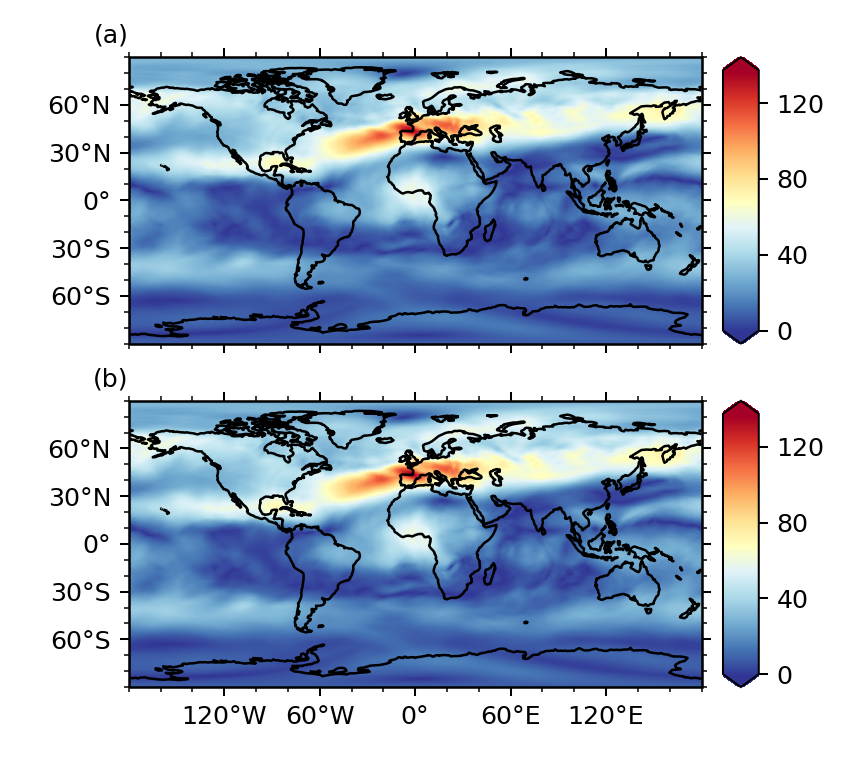

In [51]:
hca, hcb = pyic.arrange_axes(1,2, asp=0.5, projection=ccrs.PlateCarree())
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon1, lat, data1[0,0,:,:], ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
pyic.plot_settings(ax, template='global', land_facecolor='none')

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon2, lat, data2[0,0,:,:], ax=ax, cax=cax, clim='auto', projection=ccrs.PlateCarree())
pyic.plot_settings(ax, template='global', land_facecolor='none')